<a href="https://colab.research.google.com/github/Charana04/Financial-Risk-Analysis-for-Investment-Portfolios/blob/main/Financial%20Risk%20Analysis%20for%20Investment%20Portfolios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Risk Analysis for Investment Portfolios

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install yfinance


In [4]:
!pip install yfinance  # Install yfinance if not already installed

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Define stock ticker symbol (e.g., AAPL for Apple)
ticker = "AAPL"

# Fetch historical data (1 year)
stock_data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Display the first few rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583107  126.301500  123.326101  125.668857   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


In [7]:
if stock_data.empty:
    print("Error: No stock data retrieved. Check ticker symbol or internet connection.")


In [8]:
from google.colab import drive
drive.mount('/content/drive')

stock_data.to_csv('/content/drive/My Drive/stock_analysis.csv')
print("Stock data saved successfully!")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Stock data saved successfully!


In [13]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()


In [14]:
volatility = stock_data['Daily Return'].std() * (252 ** 0.5)  # Annualized
print(f"Annualized Volatility: {volatility:.2%}")


Annualized Volatility: 19.95%


In [15]:
import numpy as np

VaR_95 = np.percentile(stock_data['Daily Return'].dropna(), 5)
print(f"95% Value at Risk: {VaR_95:.2%}")


95% Value at Risk: -1.72%


In [17]:
stock_data['50-day MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200-day MA'] = stock_data['Close'].rolling(window=200).mean()


In [19]:
# Assume a portfolio with weights in AAPL and MSFT
weights = [0.6, 0.4]  # 60% AAPL, 40% MSFT
tickers = ["AAPL", "MSFT"]

# Fetch data
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Portfolio return
portfolio_return = np.dot(weights, returns.mean()) * 252
print(f"Expected Annual Portfolio Return: {portfolio_return:.2%}")

# Portfolio volatility (risk)
cov_matrix = returns.cov() * 252
portfolio_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")


[*********************100%***********************]  2 of 2 completed

Expected Annual Portfolio Return: 47.62%
Portfolio Volatility: 19.39%


In [20]:
stock_data.to_excel("stock_analysis.xlsx")


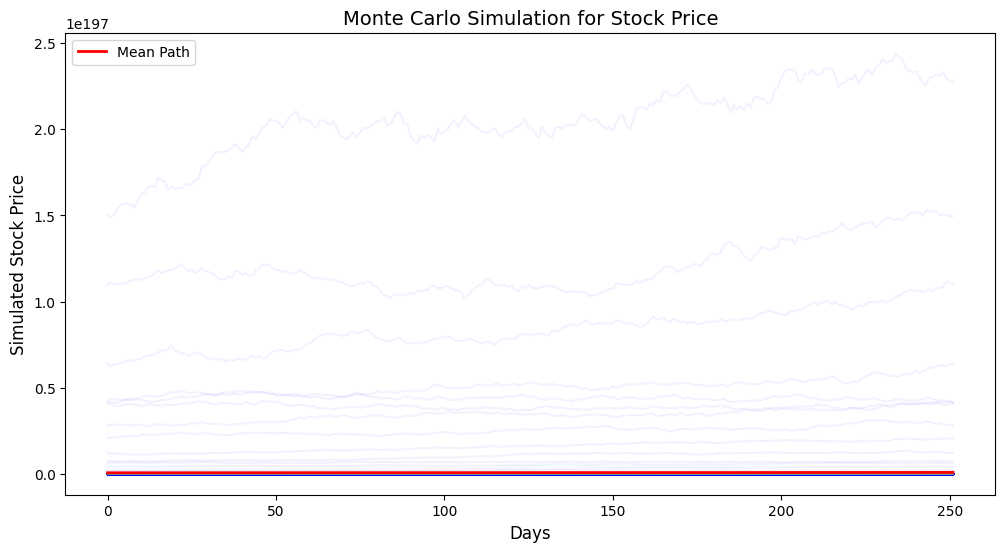

In [24]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot all simulations with reduced opacity
for i in range(1000):
    plt.plot(simulated_prices[i], color="blue", alpha=0.05)  # Very light lines

# Highlight a few random paths for clarity
for i in np.random.choice(1000, 10, replace=False):
    plt.plot(simulated_prices[i], linewidth=1.2, alpha=0.5)  # Some visible paths

# Highlight the average simulated path
mean_simulation = simulated_prices.mean(axis=0)
plt.plot(mean_simulation, color="red", linewidth=2, label="Mean Path")

# Titles & Labels
plt.title("Monte Carlo Simulation for Stock Price", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Simulated Stock Price", fontsize=12)
plt.legend()
plt.show()
